# Part 2

In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `c:\Users\skouf\Documents\2023\Semester 2\MATH2504\Assessment\Project3\Emmanuel-Skoufris-2504-2023-PROJECT3`

In [2]:
include("machine_learning_project.jl")

In [3]:
train_data = MLDatasets.MNIST.traindata(Float64);
train_imgs = train_data[1];
train_labels = train_data[2];

test_data = MLDatasets.MNIST.testdata(Float64);
test_imgs = test_data[1];
test_labels = test_data[2];
n_train, n_test = length(train_labels), length(test_labels);

┌ Warning: MNIST.traindata() is deprecated, use `MNIST(split=:train)[:]` instead.
└ @ MLDatasets C:\Users\skouf\.julia\packages\MLDatasets\mtOdX\src\datasets\vision\mnist.jl:187


┌ Warning: MNIST.testdata() is deprecated, use `MNIST(split=:test)[:]` instead.
└ @ MLDatasets C:\Users\skouf\.julia\packages\MLDatasets\mtOdX\src\datasets\vision\mnist.jl:195


In [4]:
train_data_fashion = MLDatasets.FashionMNIST.traindata(Float64);
train_imgs_fashion = train_data_fashion[1];
train_labels_fashion = train_data_fashion[2];

test_data_fashion = MLDatasets.FashionMNIST.testdata(Float64);
test_imgs_fashion = test_data_fashion[1];
test_labels_fashion = test_data_fashion[2];

n_train_fashion, n_test_fashion = length(train_labels), length(test_labels);

┌ Warning: FashionMNIST.traindata() is deprecated, use `FashionMNIST(split=:train)[:]` instead.
└ @ MLDatasets C:\Users\skouf\.julia\packages\MLDatasets\mtOdX\src\datasets\vision\fashion_mnist.jl:128


┌ Warning: FashionMNIST.testdata() is deprecated, use `FashionMNIST(split=:test)[:]` instead.
└ @ MLDatasets C:\Users\skouf\.julia\packages\MLDatasets\mtOdX\src\datasets\vision\fashion_mnist.jl:136


## Task 2.1a

In [38]:
R = zeros(28,28);

for i in 1:28
    R[i,28 - i + 1] = 1
end 

R

28×28 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱                      ⋮         
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  …  

With this matrix $R$, $(AR)^T$ is a new matrix which rotates by 90 degrees anti-clockwise certain rows and columns $A$, so that row 1 becomes column 1, column 1 becomes row 28, and so on. Essentially, it rotates the pixels of the images by 90 degrees.

In [6]:
function rotate(x, degree)
    degree == 0 && return x
    degree == 90 && return R'*x'
    degree == 180 && return R'*x*R
    degree == 270 && return (R')^2*x'*R
end;

This function takes in a matrix and then "rotates" the matrix's rows and columns. When plotting the images, these rotations will appear as clockwise rotations.

In [7]:
Random.seed!(0)

rotated_train_data = []

for k in 1:60000
    degree = sample([0, 90, 180, 270])
    A = train_data[1][:,:,k]
    push!(rotated_train_data, [rotate(A, degree), degree])
end 

rotated_train_imgs = [rotated_train_data[k][1] for k in 1:n_train]
rotated_train_labels = [rotated_train_data[k][2] for k in 1:n_train]

rotated_test_data = []

for k in 1:10000
    degree = sample([0, 90, 180, 270])
    A = test_data[1][:,:,k]
    push!(rotated_test_data, [rotate(A, degree), degree])
end 

rotated_test_imgs = [rotated_test_data[k][1] for k in 1:n_test]
rotated_test_labels = [rotated_test_data[k][2] for k in 1:n_test];

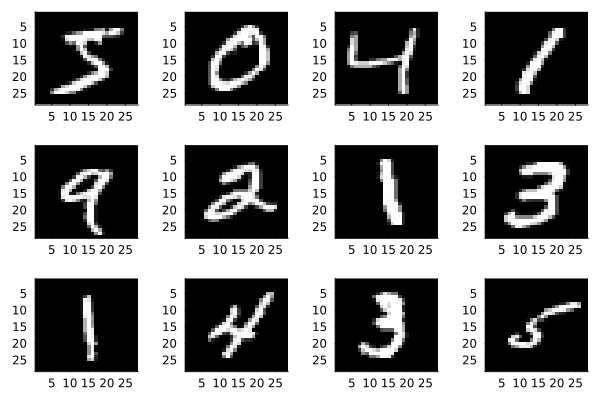

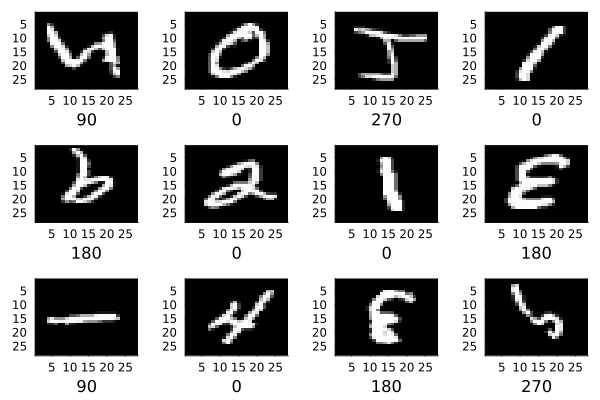

In [8]:
display(plot([heatmap(train_data[1][:,:,k]',
             yflip=true,legend=false,
             c=cgrad([:black, :white])) for k in 1:12]...))
             
display(plot([heatmap(rotated_train_data[k][1]',
            yflip=true,legend=false,
            xlabel = "$(rotated_train_data[k][2])",
            c=cgrad([:black, :white])) for k in 1:12]...))

In [9]:
rotated_train_data_fashion = []

for k in 1:60000
    degree = sample([0, 90, 180, 270])
    A = train_data_fashion[1][:,:,k]
    push!(rotated_train_data_fashion, [rotate(A, degree), degree])
end 

rotated_train_imgs_fashion = [rotated_train_data_fashion[k][1] for k in 1:n_train_fashion]
rotated_train_labels_fashion = [rotated_train_data_fashion[k][2] for k in 1:n_train_fashion]

rotated_test_data_fashion = []

for k in 1:10000
    degree = sample([0, 90, 180, 270])
    A = test_data_fashion[1][:,:,k]
    push!(rotated_test_data_fashion, [rotate(A, degree), degree])
end 

rotated_test_imgs_fashion = [rotated_test_data_fashion[k][1] for k in 1:n_test_fashion]
rotated_test_labels_fashion = [rotated_test_data_fashion[k][2] for k in 1:n_test_fashion];

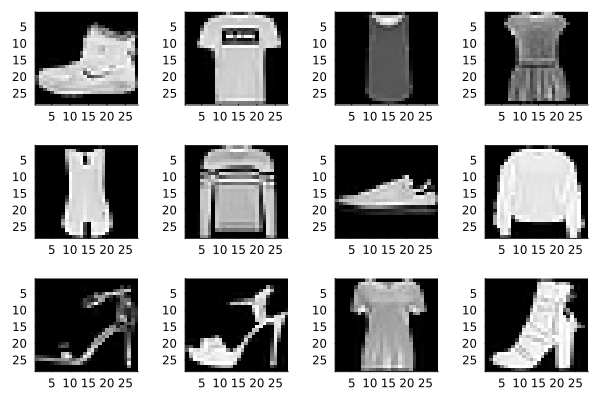

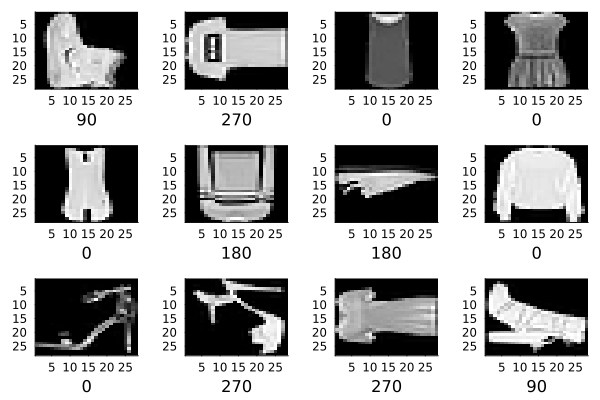

In [10]:
display(plot([heatmap(train_data_fashion[1][:,:,k]',
             yflip=true,legend=false,
             c=cgrad([:black, :white])) for k in 1:12]...))
             
display(plot([heatmap(rotated_train_data_fashion[k][1]',
            yflip=true,legend=false,
            xlabel = "$(rotated_train_labels_fashion[k])",
            c=cgrad([:black, :white])) for k in 1:12]...))

## Task 2.2a

In [11]:
X_mnist = vcat([vec(rotated_train_imgs[k])' for k in 1:n_train]...)
X_fmnist = vcat([vec(rotated_train_imgs_fashion[k])' for k in 1:n_train_fashion]...)

A = [ones(n_train) X_mnist];
B = [ones(n_train_fashion) X_fmnist];

Adag = pinv(A);
Bdag = pinv(B);

In [12]:
using Flux: onehotbatch

degrees = [0,90,180,270]
tfPM(x) = x ? +1 : -1
yDat(k) = tfPM.(onehotbatch(rotated_train_labels, degrees)'[:,k])
yDat_fashion(k) = tfPM.(onehotbatch(rotated_train_labels_fashion, degrees)'[:,k])
bets = [Adag*yDat(k) for k in 1:4];
bets_fashion = [Bdag*yDat_fashion(k) for k in 1:4];
linear_classify(square_image) = degrees[argmax([([1 ; vec(square_image)])'*bets[k] for k in 1:4])];
linear_classify_fashion(square_image) = degrees[argmax([([1 ; vec(square_image)])'*bets_fashion[k] for k in 1:4])];

In [13]:
predictions = [linear_classify(rotated_test_imgs[n]) for n in 1:n_test];
confusionMatrix = [sum((predictions .== i) .& (rotated_test_labels .== j)) for i in degrees, j in degrees]
acc = sum(diag(confusionMatrix))/n_test

println("Accuracy for MNIST dataset: ", acc, "\nConfusion Matrix:")
show(stdout, "text/plain", confusionMatrix)

Accuracy for MNIST dataset: 0.9602
Confusion Matrix:


4×4 Matrix{Int64}:
 2403    47    15    29
   38  2436    57    16
   17    29  2361    51
   36    19    44  2402

In [14]:
predictions_fashion = [linear_classify_fashion(rotated_test_imgs_fashion[n]) for n in 1:n_test_fashion];
confusionMatrix_fashion = [sum((predictions_fashion .== i) .& (rotated_test_labels_fashion .== j)) for i in degrees, j in degrees]
acc = sum(diag(confusionMatrix_fashion))/n_test_fashion

println("Accuracy for FashionMNIST dataset: ", acc, "\nConfusion Matrix:")
show(stdout, "text/plain", confusionMatrix)

Accuracy for FashionMNIST dataset: 0.8859
Confusion Matrix:
4×4 Matrix{Int64}:
 2403    47    15    29
   38  2436    57    16
   17    29  2361    51
   36    19    44  2402

## Task 2.3a

### `MNIST` images

In [ ]:
X_test_mnist = vcat([vec(rotated_test_imgs[k])' for k in 1:n_test]...)
MNIST = [X_mnist, X_test_mnist, rotated_train_labels, rotated_test_labels, n_train, n_test]

In [ ]:
using Flux, Statistics, Random, StatsBase, Plots
using Flux: params, onehotbatch, crossentropy, update!
Random.seed!(0)

logistic_softmax_predict(img_vec, W, b) = softmax(W*img_vec .+ b)
logistic_sofmax_classifier(img_vec, W, b) = degrees[argmax(logistic_softmax_predict(img_vec, W, b))] 


function train_softmax_logistic(data;mini_batch_size = 1000)
    
    #Initilize parameters
    W = randn(4,28*28)
    b = randn(4)

    opt = ADAM(0.01)
    loss(x, y) = crossentropy(logistic_softmax_predict(x, W, b), onehotbatch(y, degrees))

    loss_value = 0.0
    epoch_num = 0

    #Training loop
    while true
        prev_loss_value = loss_value
        
        #Loop over mini-batches in epoch
        start_time = time_ns()
        for batch in Iterators.partition(1:data[5], mini_batch_size)
            gs = gradient(()->loss(data[1]'[:,batch], data[3][batch]), params(W,b))
            for p in (W,b)
                update!(opt, p, gs[p])
            end
        end
        end_time = time_ns()

        #record/display progress
        epoch_num += 1
        loss_value = loss(data[1]', data[3])
        println("Epoch = $epoch_num ($(round((end_time-start_time)/1e9,digits=2)) sec) Loss = $loss_value")
        
        if epoch_num == 1 || epoch_num % 5 == 0 
            acc = mean([logistic_sofmax_classifier(data[2]'[:,k], W, b) for k in 1:data[6]] .== data[4])
            println("\tValidation accuracy: $acc") 
            
            #Stopping criteria
            abs(prev_loss_value-loss_value) < 1e-3 && break
        end
    end
    return W, b
end


In [ ]:
# Train model parameters
W, b = train_softmax_logistic(MNIST);

## `FashionMNIST` images

In [20]:
X_test_fmnist = vcat([vec(rotated_test_imgs_fashion[k])' for k in 1:n_test_fashion]...)
FashionMNIST = [X_fmnist, X_test_fmnist, rotated_train_labels_fashion, rotated_test_labels_fashion, n_train_fashion, n_test_fashion]

train_softmax_logistic(FashionMNIST);

Epoch = 1 (4.85 sec) Loss = 1.5639000610941336
	Validation accuracy: 0.6839


Epoch = 2 (4.79 sec) Loss = 0.9860195680431365


Epoch = 3 (4.98 sec) Loss = 0.7952908735210252


Epoch = 4 (4.9 sec) Loss = 0.697638694843453


Epoch = 5 (4.85 sec) Loss = 0.6355733332897693
	Validation accuracy: 0.8573


Epoch = 6 (4.87 sec) Loss = 0.5910052355441323


Epoch = 7 (4.77 sec) Loss = 0.5569874493371884


Epoch = 8 (4.72 sec) Loss = 0.529321233822946


Epoch = 9 (4.95 sec) Loss = 0.5059783656400675


Epoch = 10 (4.85 sec) Loss = 0.48579421329457917
	Validation accuracy: 0.8825


Epoch = 11 (4.85 sec) Loss = 0.46776820491899684


Epoch = 12 (4.78 sec) Loss = 0.45119301827137354


Epoch = 13 (4.82 sec) Loss = 0.4358744279032488


Epoch = 14 (4.84 sec) Loss = 0.42186913639345514


Epoch = 15 (4.84 sec) Loss = 0.4092352195239381
	Validation accuracy: 0.8931


Epoch = 16 (4.82 sec) Loss = 0.39792366670917295


Epoch = 17 (4.85 sec) Loss = 0.38778769077634667


Epoch = 18 (4.8 sec) Loss = 0.3786473794458678


Epoch = 19 (4.88 sec) Loss = 0.3703650144171604


Epoch = 20 (4.96 sec) Loss = 0.3628143002171591
	Validation accuracy: 0.8974


Epoch = 21 (4.86 sec) Loss = 0.35584229219055086


Epoch = 22 (4.87 sec) Loss = 0.3492936485929994


Epoch = 23 (4.85 sec) Loss = 0.3430672180436612


Epoch = 24 (4.82 sec) Loss = 0.33717994209141006
Epoch = 25 (4.82 sec) Loss = 0.331750988248225


	Validation accuracy: 0.9006
Epoch = 26 (4.87 sec) Loss = 0.32688588150805686

Epoch = 27 (4.82 sec) Loss = 0.322578426793816


Epoch = 28 (4.9 sec) Loss = 0.31874935845539076


Epoch = 29 (4.88 sec) Loss = 0.3153303858364454


Epoch = 30 (4.79 sec) Loss = 0.312275330240217
	Validation accuracy: 0.9028


Epoch = 31 (4.75 sec) Loss = 0.309535225587468


Epoch = 32 (4.74 sec) Loss = 0.30705096660595693


Epoch = 33 (4.76 sec) Loss = 0.30476236783684


Epoch = 34 (4.72 sec) Loss = 0.3026197814949847


Epoch = 35 (4.78 sec) Loss = 0.3005911449534974
	Validation accuracy: 0.9062


Epoch = 36 (4.77 sec) Loss = 0.29866284588870184


Epoch = 37 (4.75 sec) Loss = 0.2968355767881286


Epoch = 38 (4.86 sec) Loss = 0.2951176445363523


Epoch = 39 (4.79 sec) Loss = 0.29351841198043976


Epoch = 40 (4.76 sec) Loss = 0.29204376567021745
	Validation accuracy: 0.9069


Epoch = 41 (4.74 sec) Loss = 0.2906941936200139
Epoch = 42 (4.78 sec) Loss = 0.28946498039071195


Epoch = 43 (4.76 sec) Loss = 0.28834759141517935
Epoch = 44 (4.83 sec) Loss = 0.287331398330477

Epoch = 45 (4.91 sec) Loss = 0.28640519229410494
	Validation accuracy: 0.9076


For the `MNIST` dataset, the accuracy is 98.62%, indicating better performance than the linear classfier. Similarly, for the `FashionMNIST` dataset, the accuracy is 90.76%, which is also better than the performance of the linear classifier.  